## Calculates erosion rate uncertainties using a monte carlo simulation 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Your datasets: [name, mean, std]
datasets = [
    ['RP-1', 72.2, 1.35],
    ['RP-S2', 84.9, 1.75],
    ['RP-S3', 34, 0.642],
    ['RP-S3u', 30, 0.572],
    ['RP-S4u', 72.8, 2.85]
]

Monte Carlo Uncertainty Analysis
RP-1:
  Mean: 72.191 m/Myr
  Std Dev: 1.351 m/Myr
  1σ Range (68%): 70.865 to 73.538 (±1.337)
  2σ Range (95%): 69.577 to 74.796 (±2.609)

RP-S2:
  Mean: 84.891 m/Myr
  Std Dev: 1.753 m/Myr
  1σ Range (68%): 83.136 to 86.617 (±1.740)
  2σ Range (95%): 81.490 to 88.418 (±3.464)

RP-S3:
  Mean: 33.994 m/Myr
  Std Dev: 0.645 m/Myr
  1σ Range (68%): 33.355 to 34.634 (±0.639)
  2σ Range (95%): 32.723 to 35.259 (±1.268)

RP-S3u:
  Mean: 30.000 m/Myr
  Std Dev: 0.574 m/Myr
  1σ Range (68%): 29.427 to 30.572 (±0.572)
  2σ Range (95%): 28.883 to 31.120 (±1.119)

RP-S4u:
  Mean: 72.783 m/Myr
  Std Dev: 2.826 m/Myr
  1σ Range (68%): 69.967 to 75.567 (±2.800)
  2σ Range (95%): 67.243 to 78.297 (±5.527)

Plot saved as 'monte_carlo_results.png'


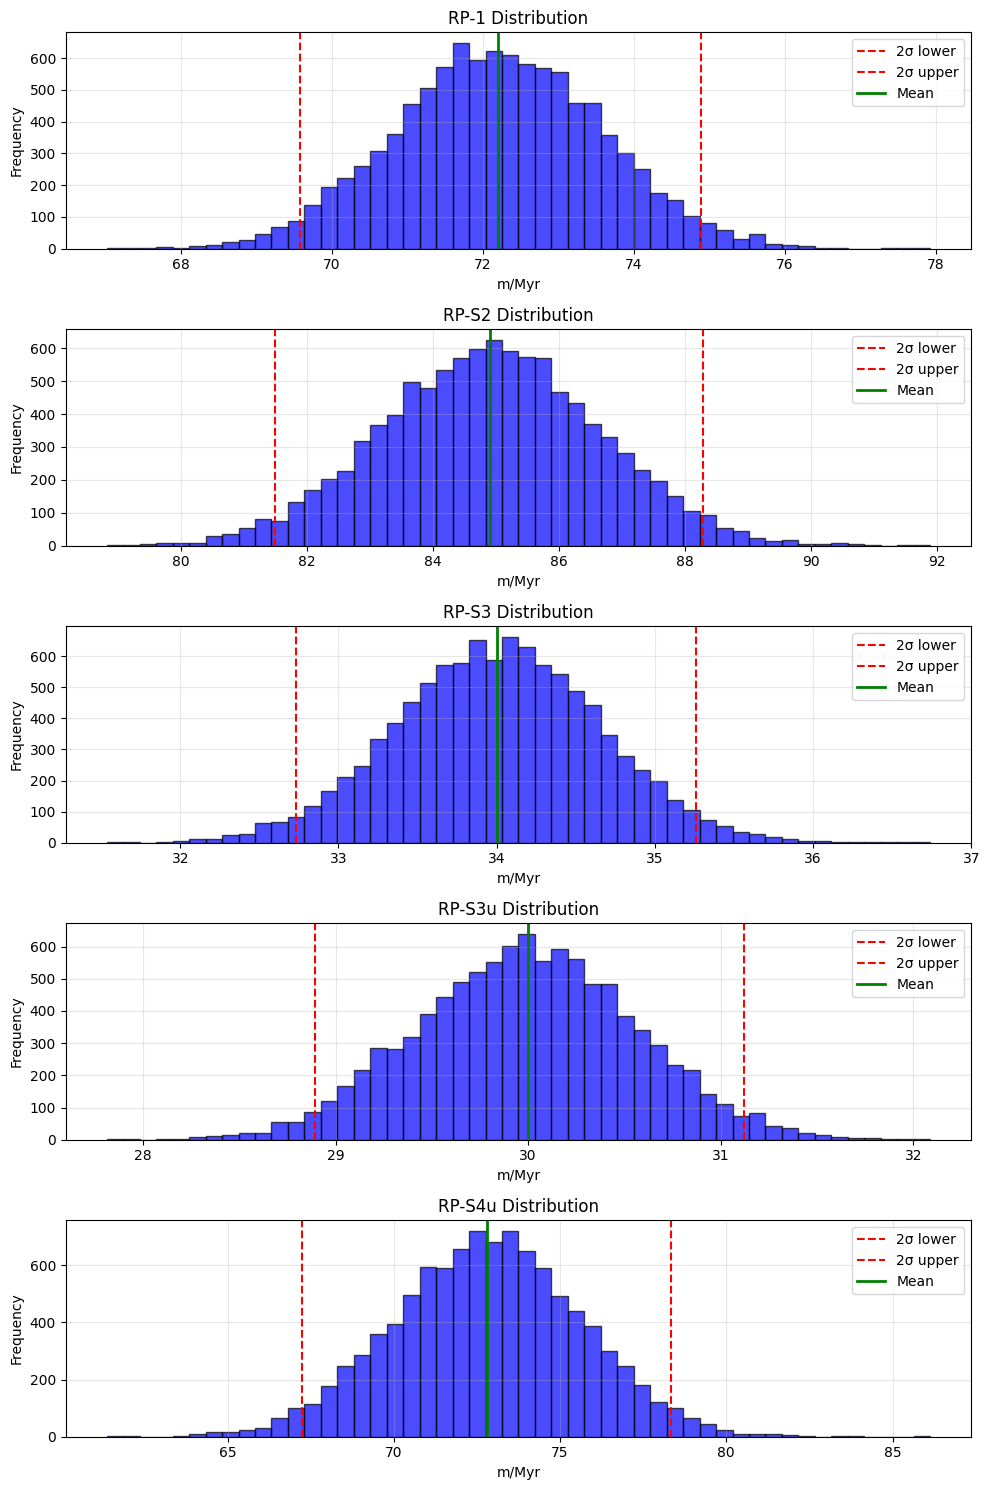

In [7]:
# set random seed
np.random.seed(17) # random seed set to arbitrary number

# Number of simulations
num_simulations = 10000 # change to what is an appropriate number / how long you want to run

print("Monte Carlo Uncertainty Analysis")

# Run simulation for each dataset
for name, mean, std in datasets:
    # Generate random samples from normal distribution
    samples = np.random.normal(mean, std, num_simulations)
    
    # Calculate percentiles for confidence intervals
    p2_5 = np.percentile(samples, 2.5)    # Lower 2σ
    p16 = np.percentile(samples, 16)      # Lower 1σ
    p50 = np.percentile(samples, 50)      # Median
    p84 = np.percentile(samples, 84)      # Upper 1σ
    p97_5 = np.percentile(samples, 97.5)  # Upper 2σ
    
    # Calculate mean and std from samples
    sample_mean = np.mean(samples)
    sample_std = np.std(samples)
    
    # Print results
    print(f"{name}:")
    print(f"  Mean: {sample_mean:.3f} m/Myr")
    print(f"  Std Dev: {sample_std:.3f} m/Myr")
    print(f"  1σ Range (68%): {p16:.3f} to {p84:.3f} (±{(p84-p16)/2:.3f})")
    print(f"  2σ Range (95%): {p2_5:.3f} to {p97_5:.3f} (±{(p97_5-p2_5)/2:.3f})")
    print()

# Create histograms for all datasets
fig, axes = plt.subplots(len(datasets), 1, figsize=(10, 3*len(datasets)))

for idx, (name, mean, std) in enumerate(datasets):
    # Generate samples
    samples = np.random.normal(mean, std, num_simulations)
    
    # Calculate percentiles
    p2_5 = np.percentile(samples, 2.5)
    p97_5 = np.percentile(samples, 97.5)
    
    # Plot histogram
    ax = axes[idx] if len(datasets) > 1 else axes
    ax.hist(samples, bins=50, alpha=0.7, color='blue', edgecolor='black')
    
    # Add vertical lines for 2σ range
    ax.axvline(p2_5, color='red', linestyle='--', label='2σ lower')
    ax.axvline(p97_5, color='red', linestyle='--', label='2σ upper')
    ax.axvline(mean, color='green', linestyle='-', linewidth=2, label='Mean')
    
    ax.set_xlabel('m/Myr')
    ax.set_ylabel('Frequency')
    ax.set_title(f'{name} Distribution')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('Figures/monte_carlo_results.png', dpi=300, bbox_inches='tight')
print("Plot saved as 'monte_carlo_results.png'")
plt.show()

# 